In [1]:
!pip install pandas matplotlib scikit-learn seaborn


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [11]:
df = pd.read_csv('dataset_part_2.csv')
X = pd.read_csv('dataset_part_3.csv')


In [13]:
Y = df['Class']


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
parameters = {"C":[0.01, 0.1, 1, 10]}
lr = LogisticRegression()
lr_cv = GridSearchCV(lr, parameters, cv=10)
lr_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10]})

In [21]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [23]:
parameters = {'max_depth': [2, 4, 6, 8, 10, 12]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12]})

In [25]:
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=10)
knn_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [27]:
yhat = lr_cv.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, yhat))


Accuracy: 0.8333333333333334


In [29]:
# Predict and calculate the accuracy for Decision Tree
tree_cv_score = tree_cv.score(X_test, Y_test)
print("Decision Tree Test Accuracy:", tree_cv_score)


Decision Tree Test Accuracy: 0.8333333333333334


In [31]:
# Define the parameters for tuning
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create the KNN model
KNN = KNeighborsClassifier()

# Create GridSearchCV
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the data
knn_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("Tuned Hyperparameters:", knn_cv.best_params_)
print("Best Accuracy:", knn_cv.best_score_)


Tuned Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Best Accuracy: 0.8482142857142858


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_true, Y_pred):
    cm = confusion_matrix(Y_true, Y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


Test Accuracy: 0.8333333333333334


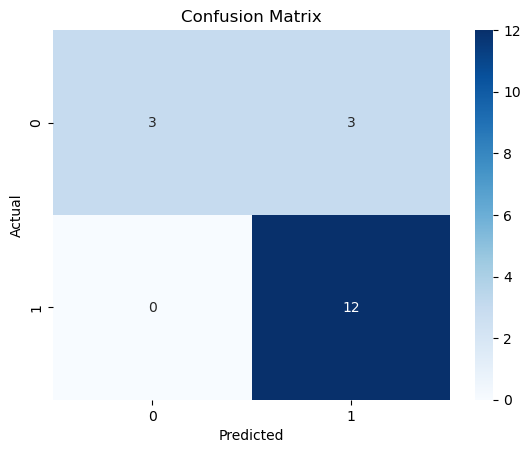

In [35]:
# Predict on test data
yhat = knn_cv.predict(X_test)

# Test accuracy
print("Test Accuracy:", accuracy_score(Y_test, yhat))

# Confusion matrix
plot_confusion_matrix(Y_test, yhat)


In [37]:
# Store the test accuracies of all models
accuracies = {
    'Logistic Regression': lr_cv.score(X_test, Y_test),
    'SVM': svm_cv.score(X_test, Y_test),
    'Decision Tree': tree_cv.score(X_test, Y_test),
    'KNN': knn_cv.score(X_test, Y_test)
}


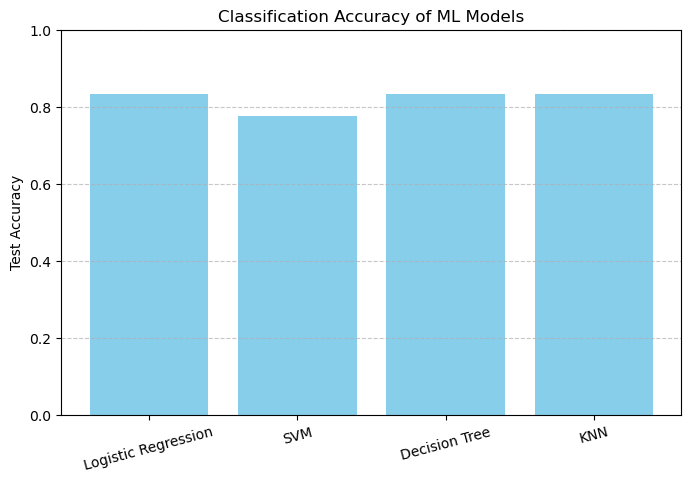

In [39]:
# Plot the model accuracies
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel('Test Accuracy')
plt.title('Classification Accuracy of ML Models')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.show()


In [41]:
# Print the best-performing model
best_model = max(accuracies, key=accuracies.get)
print(f"Best model based on test accuracy: {best_model} ({accuracies[best_model]:.2f})")


Best model based on test accuracy: Logistic Regression (0.83)
